# 3-phone direction finding
all three phones in same plane, so set z-component to 0

In [36]:
import numpy as np
import matplotlib.pyplot as plt
#
#geometry
h=np.array([[0,0,0],[np.cos(60/180*np.pi),np.sin(60/180*np.pi),0],[np.cos(120/180*np.pi),np.sin(120/180*np.pi),0]])

#estmate hydrophone connection vectors
im1=[1,2,2]
im0=[0,0,1]
D=h[im1,:]-h[im0,:]

# invert geometry needed for direction finding
DI=np.linalg.pinv(D)
print(DI)


[[ 3.33333333e-01 -3.33333333e-01 -6.66666667e-01]
 [ 5.77350269e-01  5.77350269e-01  1.66533454e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


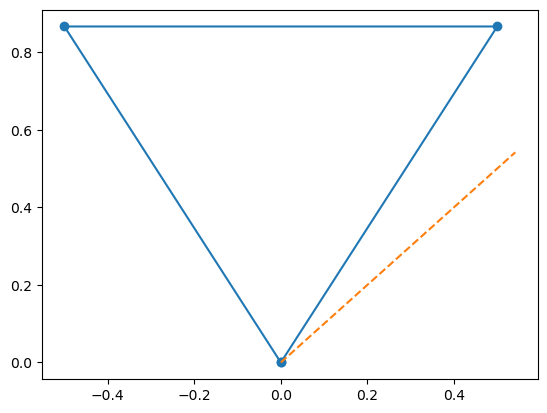

In [37]:
# simulated direction
az=45*np.pi/180
el=40*np.pi/180

S=np.array([np.cos(az)*np.cos(el),np.sin(az)*np.cos(el),np.sin(el)])

plt.plot(h[[0,1,2,0],0],h[[0,1,2,0],1],'o-')
plt.plot([0,S[0]],[0,S[1]],'--')
plt.show()

# simulate path differences
DR=np.sum(D*S,1)



In [38]:
#direction finding
M=DR
SX=DI@M

#extend direction vector and estimate z-component
SX.resize(3)
SX[2]=np.sqrt(1-np.sum(SX**2))

# estimate and print angles
az=np.arctan2(SX[1],SX[0])*180/np.pi
el=np.arctan2(SX[2],np.sqrt(SX[0]**2+SX[1]**2))*180/np.pi
print(az,el)



44.999999999999986 40.000000000000036


# 4-phone direction finding
The 4 phones in not same plane

In [39]:
import numpy as np
import matplotlib.pyplot as plt
#
#geometry
if 1:   # pyramide
    h=np.array([[0,0,0],
                [np.cos(60/180*np.pi), np.sin(60/180*np.pi), 0],
                [np.cos(120/180*np.pi),np.sin(120/180*np.pi),0],
                [0,np.sin(60/180*np.pi)-np.tan(30/180*np.pi)/2, np.sqrt(1-(np.sin(60/180*np.pi)-np.tan(30/180*np.pi)/2)**2)]])
else:   # on cube
    h=np.array([[ 1,-1,-1],
                [-1, 1,-1],
                [-1,-1, 1],
                [ 1, 1, 1]])/(2*np.sqrt(2))

#estmate hydrophone connection vectors
im1=[1,2,3,2,3,3]
im0=[0,0,0,1,1,2]
D=h[im1,:]-h[im0,:]
L=np.sqrt(np.sum(D**2,1))
#
#print(h)
#print(L)

# invert geometry needed for direction finding
DI=np.linalg.pinv(D)


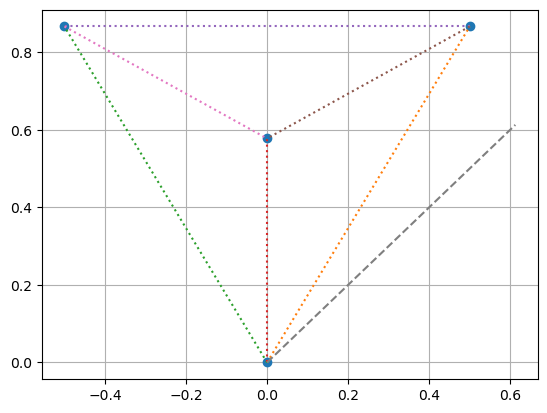

In [40]:
# simulated direction
az=45*np.pi/180
el=30*np.pi/180

S=np.array([np.cos(az)*np.cos(el),np.sin(az)*np.cos(el),np.sin(el)])

# simulate path differences
DR=np.sum(D*S,1)

plt.plot(h[:,0],h[:,1],'o')
plt.plot(h[[0,1],0],h[[0,1],1],':')
plt.plot(h[[0,2],0],h[[0,2],1],':')
plt.plot(h[[0,3],0],h[[0,3],1],':')
plt.plot(h[[1,2],0],h[[1,2],1],':')
plt.plot(h[[1,3],0],h[[1,3],1],':')
plt.plot(h[[2,3],0],h[[2,3],1],':')
plt.plot([0,S[0]],[0,S[1]],'--')
plt.grid(True)
plt.show()





In [41]:
#direction finding
M=DR
SX=DI@M

# estimate and print angles
az=np.arctan2(SX[1],SX[0])*180/np.pi
el=np.arctan2(SX[2],np.sqrt(SX[0]**2+SX[1]**2))*180/np.pi
print(az,el)


44.99999999999999 29.999999999999993
